In [1]:
import pyclesperanto as cle
import numpy as np
import pandas as pd
from skimage.io import imread, imshow

# Analysis Pipeline

Similarly to any other processing library, we can now build up an analysis pipeline using the various operations available to us. A few thing to keep in mind though:
- `push` and `pull` are costly operation, we want to do as much as possible on the GPU before `pull`ing the data
- GPU memory are limited, minimise the pipeline footprint on memory by processing per smallest unitary block

## Object segmentation

You can use classical filters like `gaussian_blur`, `threshold_otsu`, `opening` and `closing`, `top_hat`, and `connected_component_labeling`. Or pre-construct pipeline or more advance algorithm such as `voronoi_otsu_labeling` and `morphological_chan_vese`.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
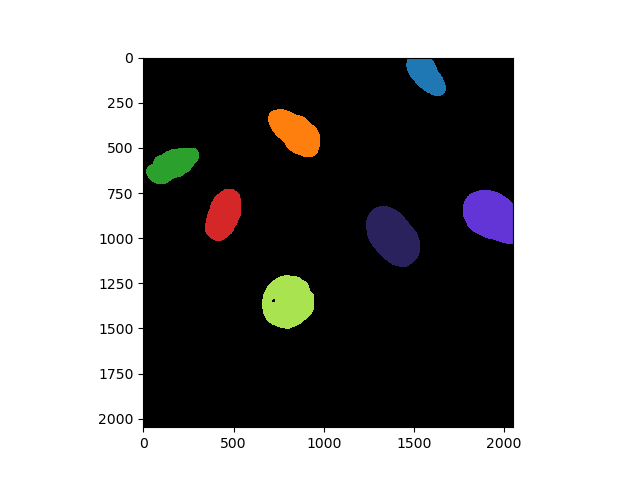

In [7]:
image = imread("../../data/1773_H11_1_copy.tif")[...,1]

sigma=13
radius=11
blurred = cle.gaussian_blur(image, sigma_x=sigma, sigma_y=sigma)
binary = cle.threshold_otsu(blurred)
segmented = cle.opening(binary, radius_x=radius, radius_y=radius)
labelled = cle.connected_component_labeling(segmented)
labelled

## Post-processing and analysis

Once we have a segmentation, we usually have to filter the results to remove unwanted objects (e.g. nuclei touching the edges) and extract some quantifications from it

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
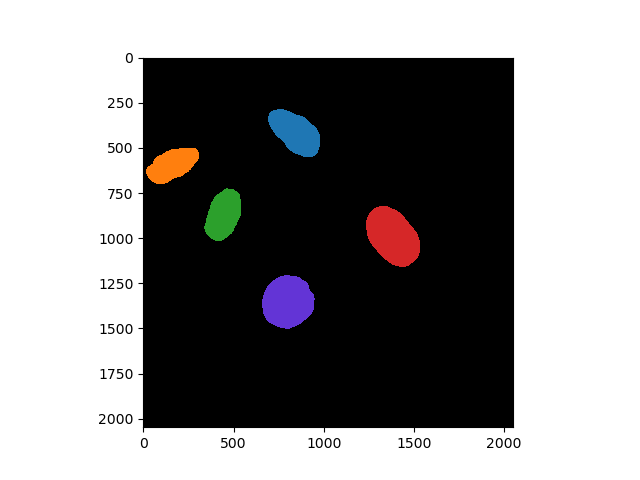

In [3]:
cleanned = cle.remove_labels_on_edges(labelled)
cleanned

In [4]:
props = cle.statistics_of_background_and_labelled_pixels(image, cleanned)
df = pd.DataFrame(props)
df.head(10)


,max_distance_to_mass_center,mean_distance_to_centroid,mean_distance_to_mass_center,sum_distance_to_centroid,centroid_y,max_distance_to_centroid,sum_y,centroid_x,mass_center_z,mass_center_y,...,sum_distance_to_mass_center,bbox_depth,bbox_max_y,centroid_z,bbox_max_z,bbox_max_x,bbox_min_z,bbox_min_y,bbox_min_x,label
0,2062.984619,799.430603,953.446167,3.136937e+09,1032.075317,1463.726440,4.049827e+09,1037.938232,0.0,679.972778,...,3.741289e+09,1.0,2047.0,0.0,0.0,2047.0,0.0,0.0,0.0,0.0
1,180.858215,90.616714,90.615395,4.557658e+06,417.544647,178.586899,2.100083e+07,843.261047,0.0,419.131714,...,4.557592e+06,1.0,555.0,0.0,0.0,981.0,0.0,288.0,692.0,1.0
2,158.019684,81.280640,81.351410,3.170920e+06,596.920349,161.616211,2.328706e+07,161.527451,0.0,596.118835,...,3.173681e+06,1.0,704.0,0.0,0.0,310.0,0.0,501.0,17.0,2.0
3,152.532837,82.380463,82.393326,3.534040e+06,873.403625,150.997513,3.746814e+07,445.035248,0.0,875.227844,...,3.534591e+06,1.0,1019.0,0.0,0.0,544.0,0.0,726.0,340.0,3.0
4,184.644226,104.167824,104.179260,7.446750e+06,992.819824,185.662750,7.097470e+07,1382.657104,0.0,991.171387,...,7.447567e+06,1.0,1161.0,0.0,0.0,1533.0,0.0,824.0,1235.0,4.0
5,157.190475,97.211555,97.239906,6.478567e+06,1355.150635,154.403809,9.031266e+07,801.048462,0.0,1353.943970,...,6.480456e+06,1.0,1503.0,0.0,0.0,949.0,0.0,1208.0,659.0,5.0


## List of operations available in pyclesperanto

In [5]:
def list_operations(search_term = None):
    ops = cle.operations(search_term)
    for name in ops:
        op = ops[name]
        func = cle.operation(name)

        if hasattr(func, 'fullargspec'):
            print(name + "(" + str(func.fullargspec.args).replace('[','').replace(']','').replace('\'','') + ")")
        else:
            print(name)

list_operations()

absolute
absolute_difference
add_image_and_scalar
add_images
add_images_weighted
affine_transform
array_equal
asarray
available_device_names
binary_and
binary_edge_detection
binary_infsup
binary_not
binary_or
binary_subtract
binary_supinf
binary_xor
block_enumerate
bottom_hat
bottom_hat_box
bottom_hat_sphere
bounding_box
categories
center_of_mass
centroids_of_labels
cl_info
clip
closing
closing_box
closing_labels
closing_sphere
combine_labels
concatenate_along_x
concatenate_along_y
concatenate_along_z
connected_component_labeling
connected_components_labeling
convolve
copy
copy_horizontal_slice
copy_slice
copy_vertical_slice
count_touching_neighbors
create
create_like
crop
crop_border
cubic_root
default_initialisation
degrees_to_radians
detect_label_edges
detect_maxima
detect_maxima_box
detect_minima
detect_minima_box
difference_of_gaussian
dilate
dilate_box
dilate_labels
dilate_sphere
divide_by_gaussian_background
divide_images
divide_scalar_by_image
equal
equal_constant
erode
erode_b